# IBM Peer Graded Assignment 

### Data - Banglore housing Data 
#### Source - https://www.kaggle.com/datasets/saipavansaketh/pune-house-data?select=Bangalore++house+data.csv

## *Description*
#### The dataset contains the price of the houses in banglore,India. The datasets gives us information on land area type, availability , size , no of bedrooms , society , area (sq ft) , no of balconys , no of bathrooms and the price in lakhs 
---
 


# *Objectives*
#### ->Data Preprocessing 
#### ->Feature engineering 
#### ->Train Test Split 
#### ->Build Linear , Lasso , Ridge and Elastic Net models 
#### ->Compare the r2 score for each of the models 
#### ->Conclude which model suits best for our dataset 
---

In [40]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [41]:
# Reading the Data 
data =  pd.read_csv("Bangalore  house data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


<AxesSubplot:>

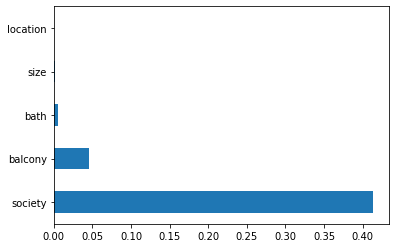

In [43]:
# finding out the number of null percentage in each columns
m = data.isnull().sum().sort_values(ascending=False)/len(data)
m[m!=0].plot(kind='barh')

Text(0.5, 1.0, '% of unique values in each col')

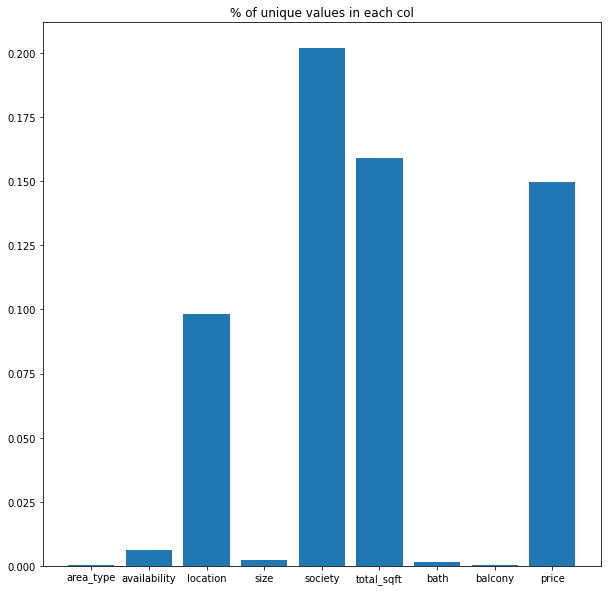

In [44]:
# Visualizing % of unique values in each col
no_of_uni_values_columns=[]
for col in data.columns:
    no_of_uni_values_columns.append(len(data[col].unique())/len(data))
plt.figure(figsize=(10,10))
plt.bar(data.columns,no_of_uni_values_columns)
plt.title("% of unique values in each col")

In [45]:
data[data['location'].isnull()].index.tolist()

[568]

In [46]:
data['location'].drop([568],axis=0)

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13319, dtype: object

In [49]:
m=data[data['size'].isnull()].index.tolist()
data['size'].drop(m,axis=0)

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13304, dtype: object

In [51]:
data['society']=data['society'].fillna('No Society')

In [59]:
m=data['total_sqft'].str.len()
n=list(m[m>7].index)
data['total_sqft'].iloc[n]

30       2100 - 2850
56       3010 - 3410
81       2957 - 3450
122      3067 - 8156
137      1042 - 1105
            ...     
12990    1804 - 2273
13059    1200 - 1470
13240    1020 - 1130
13265    1133 - 1384
13299    2830 - 2882
Name: total_sqft, Length: 242, dtype: object

In [63]:
data_new=data
data_new.drop(n,axis=0,inplace=True)
data_new['total_sqft'].astype('float64')

ValueError: could not convert string to float: '30Acres'